## Optimal Portfolio Selection

Getting Down Jowns Index Tickers

In [185]:
import pandas as pd
import yfinance as yf
import seaborn as sns

In [186]:
pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")

[                                                   0  \
 0  Historical logarithmic graph of the DJIA from ...   
 1                                         Foundation   
 2                                           Operator   
 3                                          Exchanges   
 4                                     Trading symbol   
 5                                       Constituents   
 6                                               Type   
 7                                         Market cap   
 8                                   Weighting method   
 9                                            Website   
 
                                                    1  
 0  Historical logarithmic graph of the DJIA from ...  
 1  February 16, 1885; 139 years ago[1] May 26, 18...  
 2                              S&P Dow Jones Indices  
 3  .mw-parser-output .plainlist ol,.mw-parser-out...  
 4                                  ^DJI$INDU.DJIDJIA  
 5                                 

In [187]:
const = pd.read_html("https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average")[1]
const = const.iloc[:, :5].copy()
const

,Company,Exchange,Symbol,Industry,Date added
0,3M,NYSE,MMM,Conglomerate,1976-08-09
1,American Express,NYSE,AXP,Financial services,1982-08-30
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12


In [188]:
const.Symbol[1]

'AXP'

In [189]:
const.Symbol.to_list()

['MMM',
 'AXP',
 'AMGN',
 'AMZN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WMT']

In [190]:
const.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     30 non-null     object
 1   Exchange    30 non-null     object
 2   Symbol      30 non-null     object
 3   Industry    30 non-null     object
 4   Date added  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [17]:
#const.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))

0      MMM
1      AXP
2     AMGN
3     AMZN
4     AAPL
5       BA
6      CAT
7      CVX
8     CSCO
9       KO
10     DIS
11     DOW
12      GS
13      HD
14     HON
15     IBM
16    INTC
17     JNJ
18     JPM
19     MCD
20     MRK
21    MSFT
22     NKE
23      PG
24     CRM
25     TRV
26     UNH
27      VZ
28       V
29     WMT
Name: Symbol, dtype: object

In [192]:
#const.Symbol = const.Symbol.apply(lambda x: unicodedata.normalize("NFKD", x))
const["Ticker"] = const.Symbol.str.split(": ").apply(lambda x: x[-1])

In [193]:
ticker_list = const.Ticker.to_list()

In [39]:
ticker_list

['MMM',
 'AXP',
 'AMGN',
 'AMZN',
 'AAPL',
 'BA',
 'CAT',
 'CVX',
 'CSCO',
 'KO',
 'DIS',
 'DOW',
 'GS',
 'HD',
 'HON',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'MCD',
 'MRK',
 'MSFT',
 'NKE',
 'PG',
 'CRM',
 'TRV',
 'UNH',
 'VZ',
 'V',
 'WMT']

## Getting prices from Yahoo Finance

In [43]:
prices = yf.download(ticker_list, start = "2007-01-01", end = "2023-12-31")

[*********************100%%**********************]  30 of 30 completed


In [52]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4278 entries, 2007-01-03 to 2023-12-29
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    4278 non-null   float64
 1   AMGN    4278 non-null   float64
 2   AMZN    4278 non-null   float64
 3   AXP     4278 non-null   float64
 4   BA      4278 non-null   float64
 5   CAT     4278 non-null   float64
 6   CRM     4278 non-null   float64
 7   CSCO    4278 non-null   float64
 8   CVX     4278 non-null   float64
 9   DIS     4278 non-null   float64
 10  DOW     1205 non-null   float64
 11  GS      4278 non-null   float64
 12  HD      4278 non-null   float64
 13  HON     4278 non-null   float64
 14  IBM     4278 non-null   float64
 15  INTC    4278 non-null   float64
 16  JNJ     4278 non-null   float64
 17  JPM     4278 non-null   float64
 18  KO      4278 non-null   float64
 19  MCD     4278 non-null   float64
 20  MMM     4278 non-null   float64
 21  MRK     4278 non-nu

In [194]:
pd.set_option('display.max_columns', None)

In [195]:
prices.head()

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,1.9350,60.360001,89.169998,61.160000,9.0175,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,42.996967,92.992355,20.350000,66.400002,48.070000,24.290001,43.869999,78.260002,42.003819,29.860001,12.20875,64.540001,53.549999,52.570000,NaN,35.306732,15.850000
2007-01-04,3.059286,71.330002,1.9450,59.919998,89.529999,61.000000,9.4700,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,42.977898,93.986618,21.170000,67.230003,48.189999,24.299999,43.540001,77.949997,43.043892,29.809999,12.33375,64.050003,53.099998,52.910000,NaN,35.502777,15.926667
2007-01-05,3.037500,71.500000,1.9185,59.130001,89.150002,60.220001,9.8800,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,42.567947,93.135757,21.100000,66.620003,47.790001,24.129999,43.540001,77.419998,42.270992,29.639999,12.35375,63.500000,52.410000,52.549999,NaN,34.895969,15.796667
2007-01-08,3.052500,70.930000,1.8750,59.689999,88.940002,60.290001,9.9825,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,42.825359,94.550667,21.010000,66.510002,47.950001,24.285000,43.709999,77.589996,42.261452,29.930000,12.31625,63.639999,52.020000,53.320000,NaN,34.363850,15.666667
2007-01-09,3.306071,71.269997,1.8890,59.310001,88.000000,60.619999,9.9900,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,43.130436,95.669212,21.030001,66.260002,47.750000,24.305000,43.790001,77.680000,41.870228,29.959999,12.47000,63.480000,51.889999,52.680000,NaN,34.503880,15.796667


In [48]:
prices = prices.loc[:,"Close"].copy()

In [51]:
prices.shape

(4278, 30)

In [85]:
dji = yf.download("^DJI", start = "2007-01-01",  end = "2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [86]:
dji.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4278 entries, 2007-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4278 non-null   float64
 1   High       4278 non-null   float64
 2   Low        4278 non-null   float64
 3   Close      4278 non-null   float64
 4   Adj Close  4278 non-null   float64
 5   Volume     4278 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 234.0 KB


In [87]:
prices.to_csv("const_prices.csv")
dji.to_csv("dji.csv")

In [88]:
const = pd.read_csv("const_prices.csv", parse_dates = ["Date"], index_col = "Date")
dji = pd.read_csv("dji.csv", parse_dates = ["Date"], index_col = "Date")

In [89]:
dji = dji.Close.to_frame().copy()

In [90]:
df = pd.concat([const, dji], axis = 1)
df

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT,Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,1.935000,60.360001,89.169998,61.160000,9.017500,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,42.996967,92.992355,20.350000,66.400002,48.070000,24.290001,43.869999,78.260002,42.003819,29.860001,12.208750,64.540001,53.549999,52.570000,NaN,35.306732,15.850000,12474.519531
2007-01-04,3.059286,71.330002,1.945000,59.919998,89.529999,61.000000,9.470000,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,42.977898,93.986618,21.170000,67.230003,48.189999,24.299999,43.540001,77.949997,43.043892,29.809999,12.333750,64.050003,53.099998,52.910000,NaN,35.502777,15.926667,12480.690430
2007-01-05,3.037500,71.500000,1.918500,59.130001,89.150002,60.220001,9.880000,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,42.567947,93.135757,21.100000,66.620003,47.790001,24.129999,43.540001,77.419998,42.270992,29.639999,12.353750,63.500000,52.410000,52.549999,NaN,34.895969,15.796667,12398.009766
2007-01-08,3.052500,70.930000,1.875000,59.689999,88.940002,60.290001,9.982500,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,42.825359,94.550667,21.010000,66.510002,47.950001,24.285000,43.709999,77.589996,42.261452,29.930000,12.316250,63.639999,52.020000,53.320000,NaN,34.363850,15.666667,12423.490234
2007-01-09,3.306071,71.269997,1.889000,59.310001,88.000000,60.619999,9.990000,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,43.130436,95.669212,21.030001,66.260002,47.750000,24.305000,43.790001,77.680000,41.870228,29.959999,12.470000,63.480000,51.889999,52.680000,NaN,34.503880,15.796667,12416.599609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.600006,284.160004,153.419998,185.570007,260.440002,290.359985,266.339996,50.090000,151.050003,91.019997,55.119999,380.649994,348.589996,205.639999,162.139999,48.000000,155.460007,167.399994,58.320000,291.700012,106.330002,107.699997,374.579987,108.040001,145.279999,185.800003,520.309998,258.429993,37.490002,52.216667,37385.968750
2023-12-26,193.050003,283.899994,153.410004,185.960007,262.790009,295.630005,266.220001,50.279999,152.410004,90.949997,55.709999,381.609985,349.309998,208.039993,163.210007,50.500000,156.139999,168.389999,58.560001,292.859985,108.110001,107.629997,374.660004,108.019997,145.940002,187.089996,520.030029,259.160004,37.480000,52.136665,37545.328125
2023-12-27,193.149994,286.529999,153.339996,187.059998,262.100006,298.119995,266.720001,50.439999,151.910004,90.379997,55.709999,384.480011,348.529999,209.020004,163.460007,50.759998,156.350006,169.399994,58.709999,294.549988,108.739998,107.980003,374.070007,107.129997,146.059998,188.619995,522.789978,258.929993,37.310001,52.626667,37656.519531


In [91]:
df.rename(columns = {"Close": "DJI"}, inplace = True)

In [92]:
more_info = pd.read_csv("const.csv")
more_info

,Company,Exchange,Symbol,Industry,Date added,Ticker
0,3M,NYSE,MMM,Conglomerate,1976-08-09,MMM
1,American Express,NYSE,AXP,Financial services,1982-08-30,AXP
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,AMGN
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,AMZN
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,AAPL
5,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,BA
6,Caterpillar,NYSE,CAT,Construction and mining,1991-05-06,CAT
7,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,CVX
8,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,CSCO
9,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,KO


## Data Transformation

In [93]:
const.head()

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,2.992857,68.400002,1.9350,60.360001,89.169998,61.160000,9.0175,27.730000,70.970001,33.738300,NaN,200.720001,41.070000,42.996967,92.992355,20.350000,66.400002,48.070000,24.290001,43.869999,78.260002,42.003819,29.860001,12.20875,64.540001,53.549999,52.570000,NaN,35.306732,15.850000
2007-01-04,3.059286,71.330002,1.9450,59.919998,89.529999,61.000000,9.4700,28.459999,70.279999,34.004654,NaN,198.850006,40.570000,42.977898,93.986618,21.170000,67.230003,48.189999,24.299999,43.540001,77.949997,43.043892,29.809999,12.33375,64.050003,53.099998,52.910000,NaN,35.502777,15.926667
2007-01-05,3.037500,71.500000,1.9185,59.130001,89.150002,60.220001,9.8800,28.469999,70.550003,33.728436,NaN,199.050003,39.790001,42.567947,93.135757,21.100000,66.620003,47.790001,24.129999,43.540001,77.419998,42.270992,29.639999,12.35375,63.500000,52.410000,52.549999,NaN,34.895969,15.796667
2007-01-08,3.052500,70.930000,1.8750,59.689999,88.940002,60.290001,9.9825,28.629999,71.449997,34.034248,NaN,203.729996,39.490002,42.825359,94.550667,21.010000,66.510002,47.950001,24.285000,43.709999,77.589996,42.261452,29.930000,12.31625,63.639999,52.020000,53.320000,NaN,34.363850,15.666667
2007-01-09,3.306071,71.269997,1.8890,59.310001,88.000000,60.619999,9.9900,28.469999,70.629997,33.984924,NaN,204.080002,39.320000,43.130436,95.669212,21.030001,66.260002,47.750000,24.305000,43.790001,77.680000,41.870228,29.959999,12.47000,63.480000,51.889999,52.680000,NaN,34.503880,15.796667


In [94]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

/var/folders/lq/3xgm6bvs78s1l6992jwdsntm0000gn/T/ipykernel_70509/611362656.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


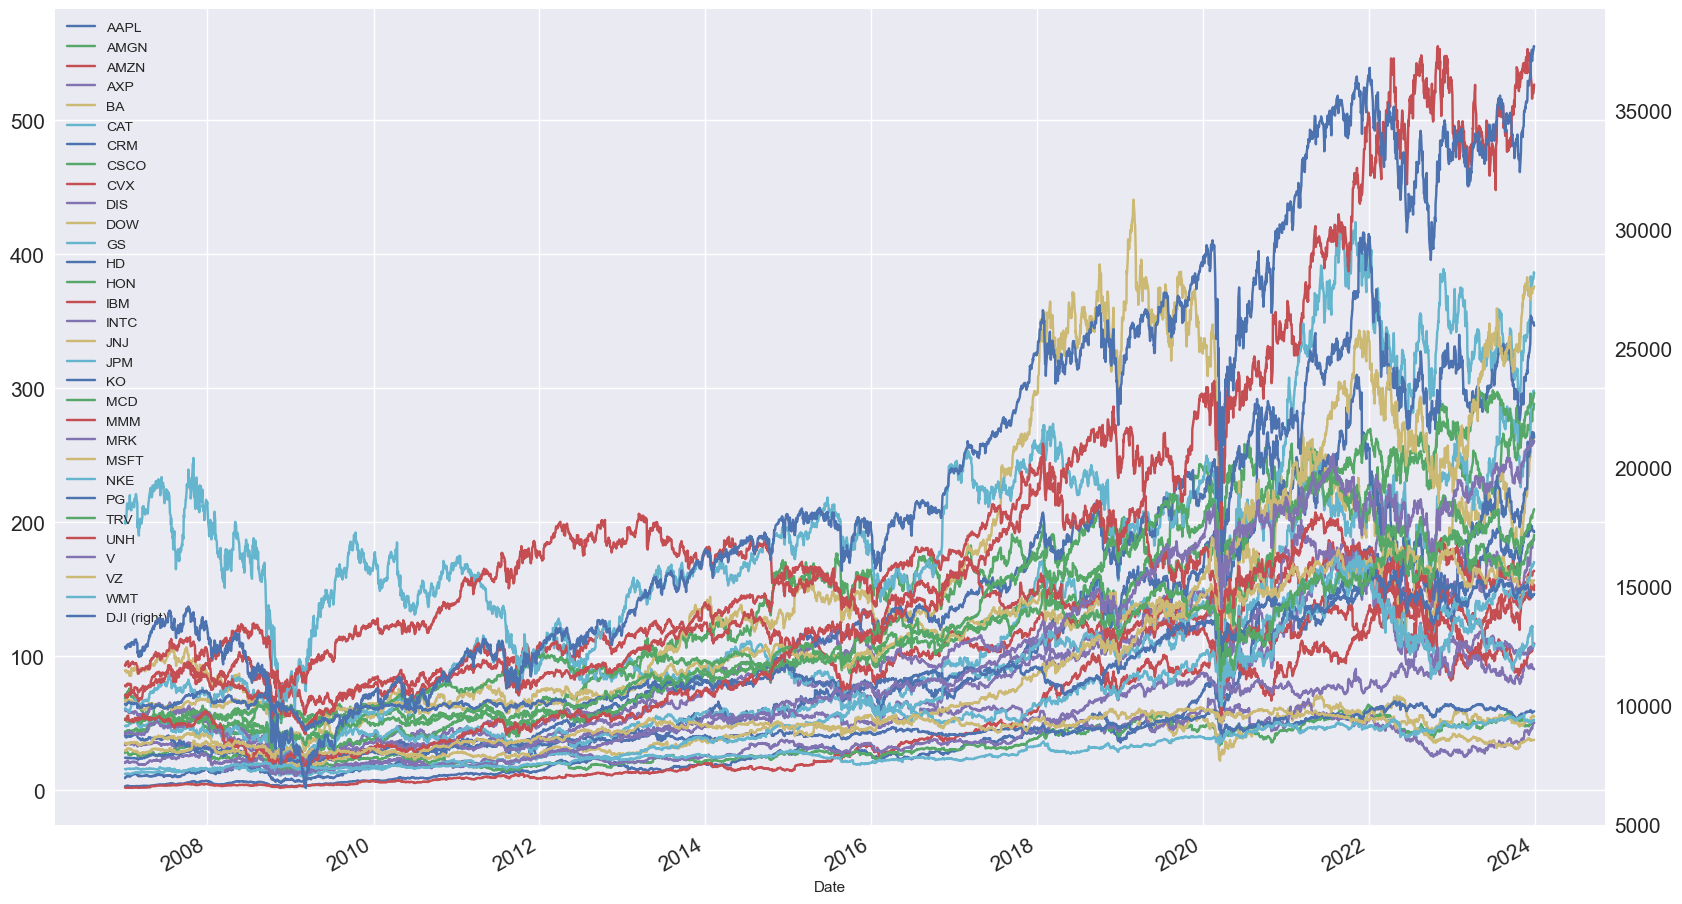

In [95]:
df.plot(figsize = (20, 12), fontsize = 15, secondary_y = "DJI")
plt.show()

In [96]:
df.div(df.iloc[0]).mul(100)

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,100.000000,100.000000,100.000000
2007-01-04,102.219589,104.283626,100.516802,99.271036,100.403724,99.738391,105.018024,102.632526,99.027755,100.789470,NaN,99.068356,98.782566,99.955649,101.069188,104.029482,101.250003,100.249634,100.041162,99.247782,99.603878,102.476140,99.832548,101.023856,99.240784,99.159662,100.646757,NaN,100.555262,100.483702,100.049468
2007-01-05,101.491649,104.532161,99.147287,97.962227,99.977575,98.463050,109.564737,102.668589,99.408203,99.970761,NaN,99.167996,96.883373,99.002209,100.154208,103.685504,100.331327,99.417519,99.341286,99.247782,98.926650,100.636070,99.263224,101.187677,98.388595,97.871150,99.961955,NaN,98.836588,99.663512,99.386672
2007-01-08,101.992846,103.698829,96.899228,98.889990,99.742071,98.577503,110.701416,103.245581,100.676336,100.877187,NaN,101.499599,96.152914,99.600884,101.675741,103.243242,100.165664,99.750366,99.979411,99.635286,99.143872,100.613357,100.234426,100.880517,98.605514,97.142859,101.426669,NaN,97.329454,98.843322,99.590932
2007-01-09,110.465387,104.195899,97.622745,98.260439,98.687902,99.117068,110.784584,102.668589,99.520919,100.730991,NaN,101.673974,95.738982,100.310414,102.878577,103.341525,99.789158,99.334305,100.061751,99.817648,99.258878,99.681956,100.334891,102.139863,98.357606,96.900094,100.209246,NaN,97.726064,99.663512,99.535694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,6468.735641,415.438593,7928.682310,307.438710,292.071333,474.754719,2953.590226,180.634695,212.836410,269.782401,NaN,189.642284,848.770389,478.266288,174.358418,235.872231,234.126511,348.242136,240.098796,664.919123,135.867619,256.405253,1254.454049,884.939105,225.100708,346.965463,989.747005,NaN,106.183720,329.442687,299.698667
2023-12-26,6450.358450,415.058461,7928.165798,308.084832,294.706756,483.371494,2952.259534,181.319869,214.752714,269.574922,NaN,190.120558,850.523497,483.848062,175.509058,248.157244,235.150596,350.301644,241.086864,667.563238,138.142087,256.238602,1254.722023,884.775253,226.123335,349.374415,989.214442,NaN,106.155391,328.937944,300.976146
2023-12-27,6453.699433,418.903498,7924.547849,309.907216,293.932950,487.442766,2957.804308,181.896861,214.048191,267.885449,NaN,191.550423,848.624303,486.127319,175.777897,249.434877,235.466871,352.402736,241.704392,671.415534,138.947093,257.071874,1252.746148,877.485404,226.309259,352.231555,994.464487,NaN,105.673901,332.029437,301.867494


In [97]:
norm = df.div(df.iloc[0]).mul(100)

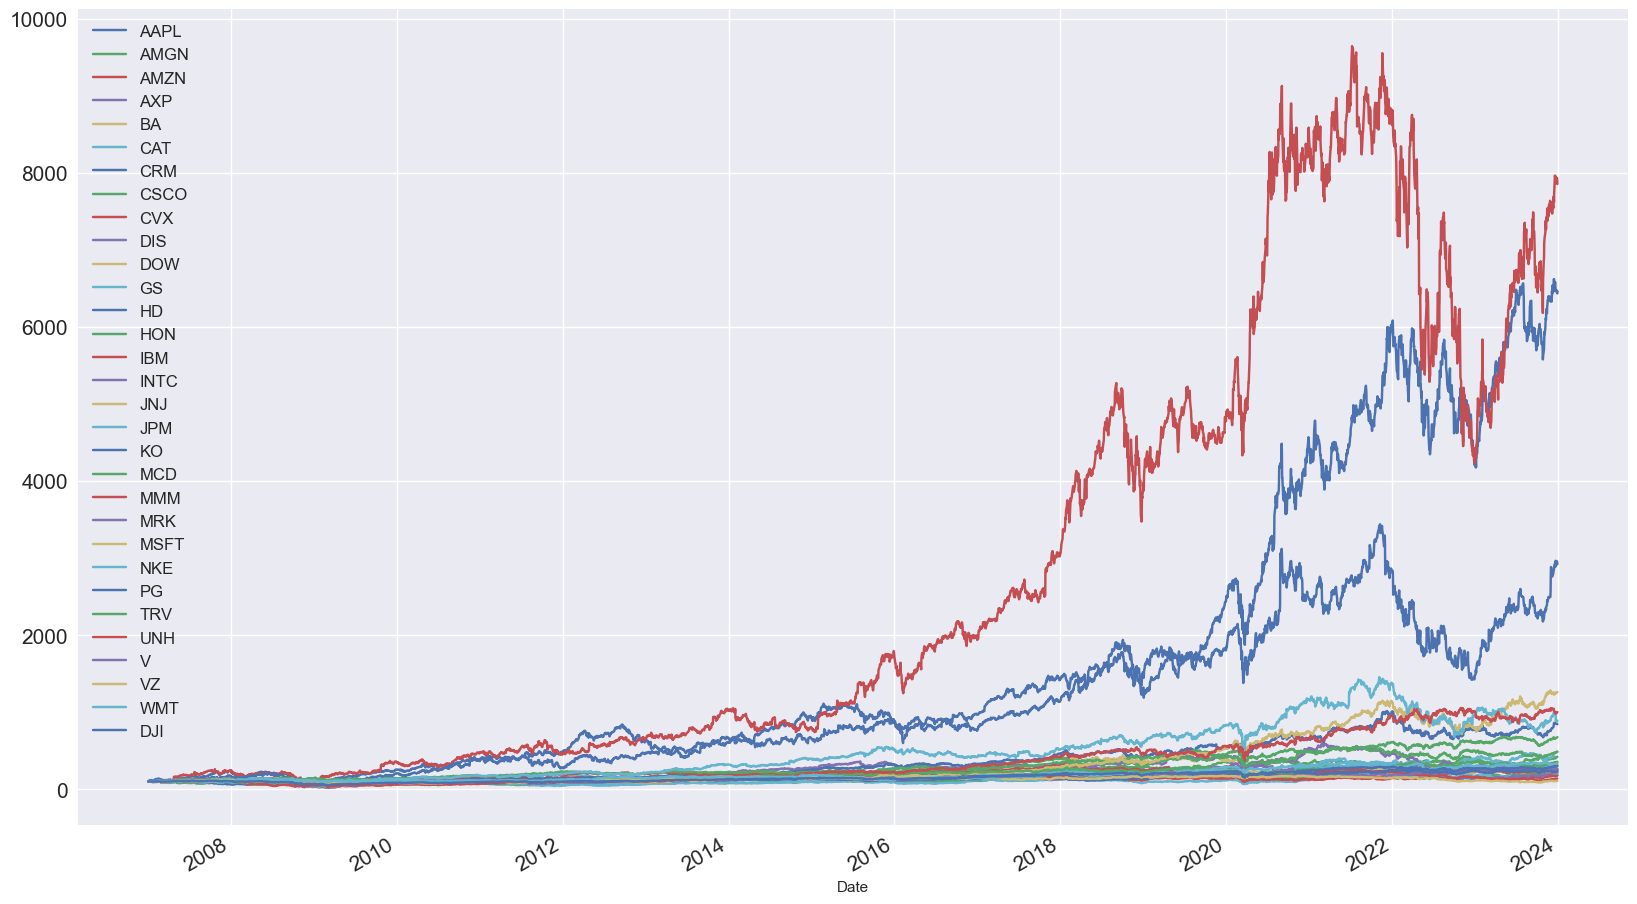

In [98]:
norm.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

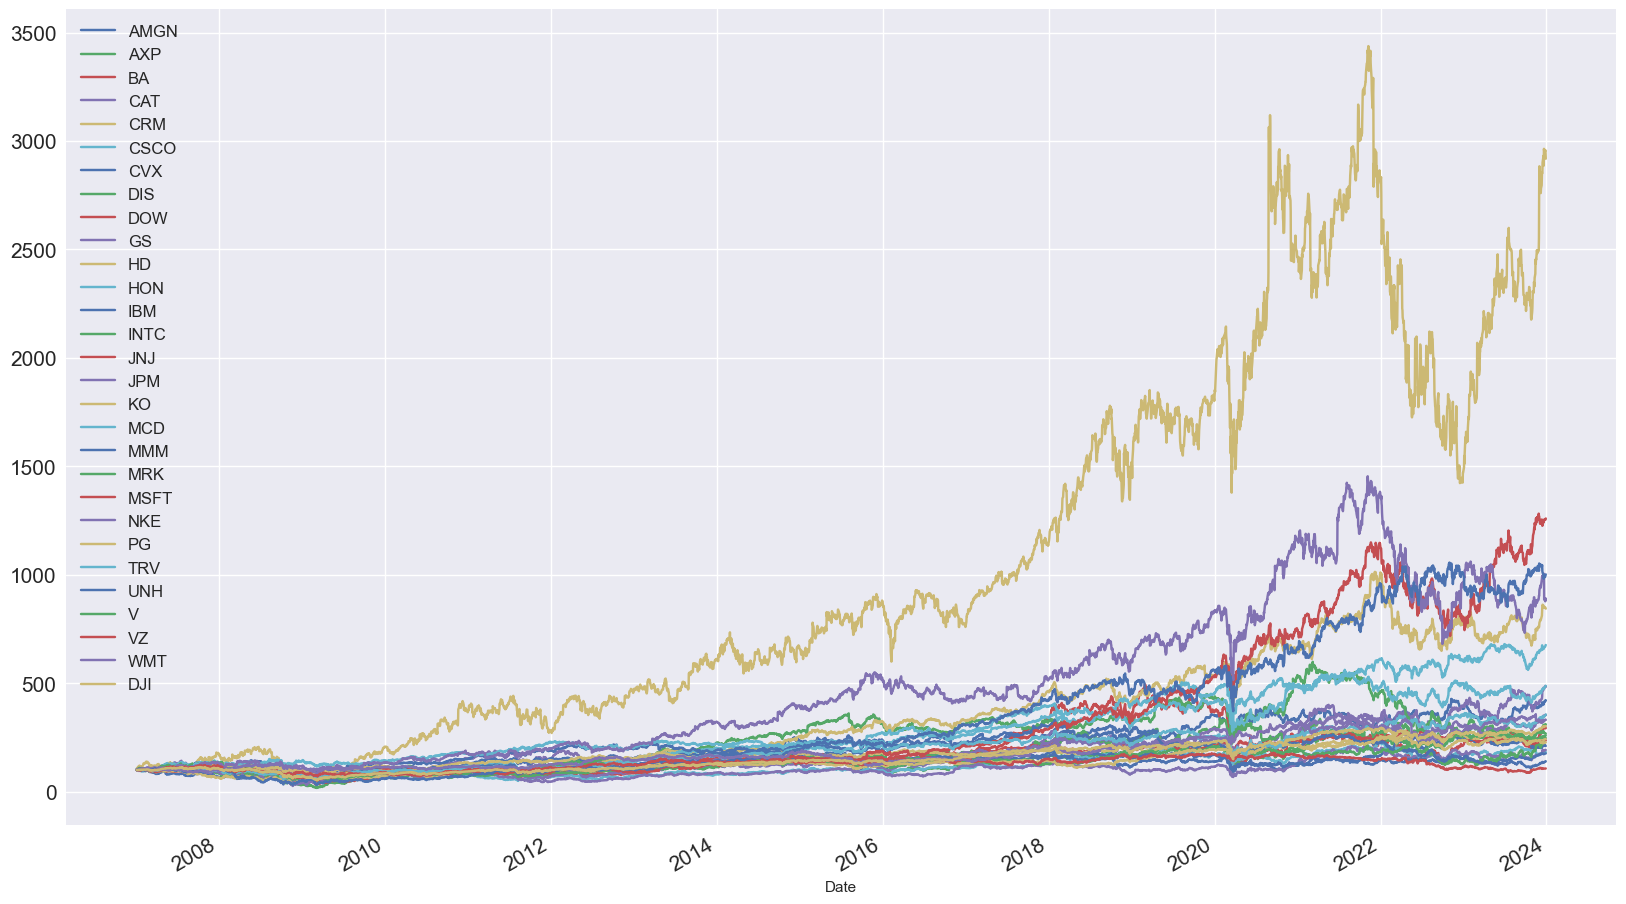

In [197]:
norm.drop(columns =["AMZN","AAPL"]).plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [201]:
ret = df.pct_change()
ret.describe()


,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT,DJI
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,1204.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,3973.000000,4277.000000,4277.000000,4277.000000
mean,0.001175,0.000472,0.001309,0.000541,0.000513,0.000577,0.001113,0.000305,0.000348,0.000393,0.000372,0.000417,0.000643,0.000506,0.000242,0.000419,0.000263,0.000590,0.000279,0.000527,0.000191,0.000343,0.000752,0.000684,0.000261,0.000455,0.000736,0.000905,0.000106,0.000365,0.000332
std,0.020018,0.016531,0.024210,0.023585,0.022876,0.020419,0.025548,0.018136,0.018658,0.018088,0.024056,0.023093,0.016967,0.016471,0.014831,0.020334,0.011124,0.024380,0.012002,0.012704,0.015014,0.015498,0.017891,0.018639,0.011798,0.017767,0.019944,0.018541,0.013449,0.013007,0.012076
min,-0.179195,-0.095846,-0.140494,-0.175949,-0.238484,-0.142822,-0.184533,-0.162107,-0.221248,-0.131632,-0.216577,-0.189596,-0.197938,-0.120868,-0.128507,-0.180415,-0.100379,-0.207274,-0.096725,-0.158754,-0.129450,-0.147383,-0.147390,-0.128081,-0.087373,-0.208004,-0.186362,-0.136435,-0.080685,-0.113757,-0.129265
25%,-0.008067,-0.007720,-0.009955,-0.008343,-0.009460,-0.009187,-0.010929,-0.007400,-0.008020,-0.007708,-0.011613,-0.009729,-0.007156,-0.006848,-0.006492,-0.009362,-0.004773,-0.008767,-0.005140,-0.005387,-0.006353,-0.006957,-0.007721,-0.008038,-0.005044,-0.006651,-0.007931,-0.007760,-0.006477,-0.005667,-0.004210
50%,0.001000,0.000156,0.000782,0.000624,0.000527,0.000511,0.000714,0.000430,0.000700,0.000343,0.000174,0.000280,0.000680,0.000672,0.000451,0.000556,0.000173,0.000230,0.000500,0.000753,0.000539,0.000183,0.000494,0.000544,0.000339,0.000765,0.000706,0.001184,0.000306,0.000508,0.000564
75%,0.011500,0.008724,0.012408,0.009822,0.010597,0.010528,0.013194,0.008547,0.008800,0.008500,0.012101,0.010516,0.008499,0.008033,0.007440,0.010350,0.005690,0.009486,0.005966,0.006528,0.007361,0.007876,0.009459,0.009506,0.005886,0.007733,0.009146,0.009215,0.006851,0.006452,0.005563
max,0.139049,0.139192,0.269497,0.218823,0.243186,0.147229,0.260449,0.159505,0.227407,0.159722,0.209091,0.264678,0.140666,0.150684,0.115150,0.195213,0.122292,0.250967,0.138795,0.181254,0.125986,0.126508,0.186047,0.155314,0.120090,0.255556,0.347550,0.149973,0.146324,0.117085,0.113650


In [109]:
def summary_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Return"] = summary["mean"] * 252
    summary["Risk"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [110]:
summary = summary_ann(ret)
summary

,Return,Risk
AAPL,0.296059,0.317782
AMGN,0.118962,0.262417
AMZN,0.329872,0.384317
AXP,0.136276,0.374396
BA,0.129152,0.363153
CAT,0.145380,0.324138
CRM,0.280369,0.405568
CSCO,0.076975,0.287897
CVX,0.087707,0.296184
DIS,0.099086,0.287136


In [111]:
summary = summary.merge(more_info.loc[:, ["Ticker", "Company"]],
                        how = "left", left_index= True, right_on = "Ticker")

summary.set_index("Company", inplace = True)

In [112]:
summary

,Return,Risk,Ticker
Company,,,
Apple,0.296059,0.317782,AAPL
Amgen,0.118962,0.262417,AMGN
Amazon,0.329872,0.384317,AMZN
American Express,0.136276,0.374396,AXP
Boeing,0.129152,0.363153,BA
Caterpillar,0.145380,0.324138,CAT
Salesforce,0.280369,0.405568,CRM
Cisco,0.076975,0.287897,CSCO
Chevron,0.087707,0.296184,CVX


## Exploratory Data Analysis

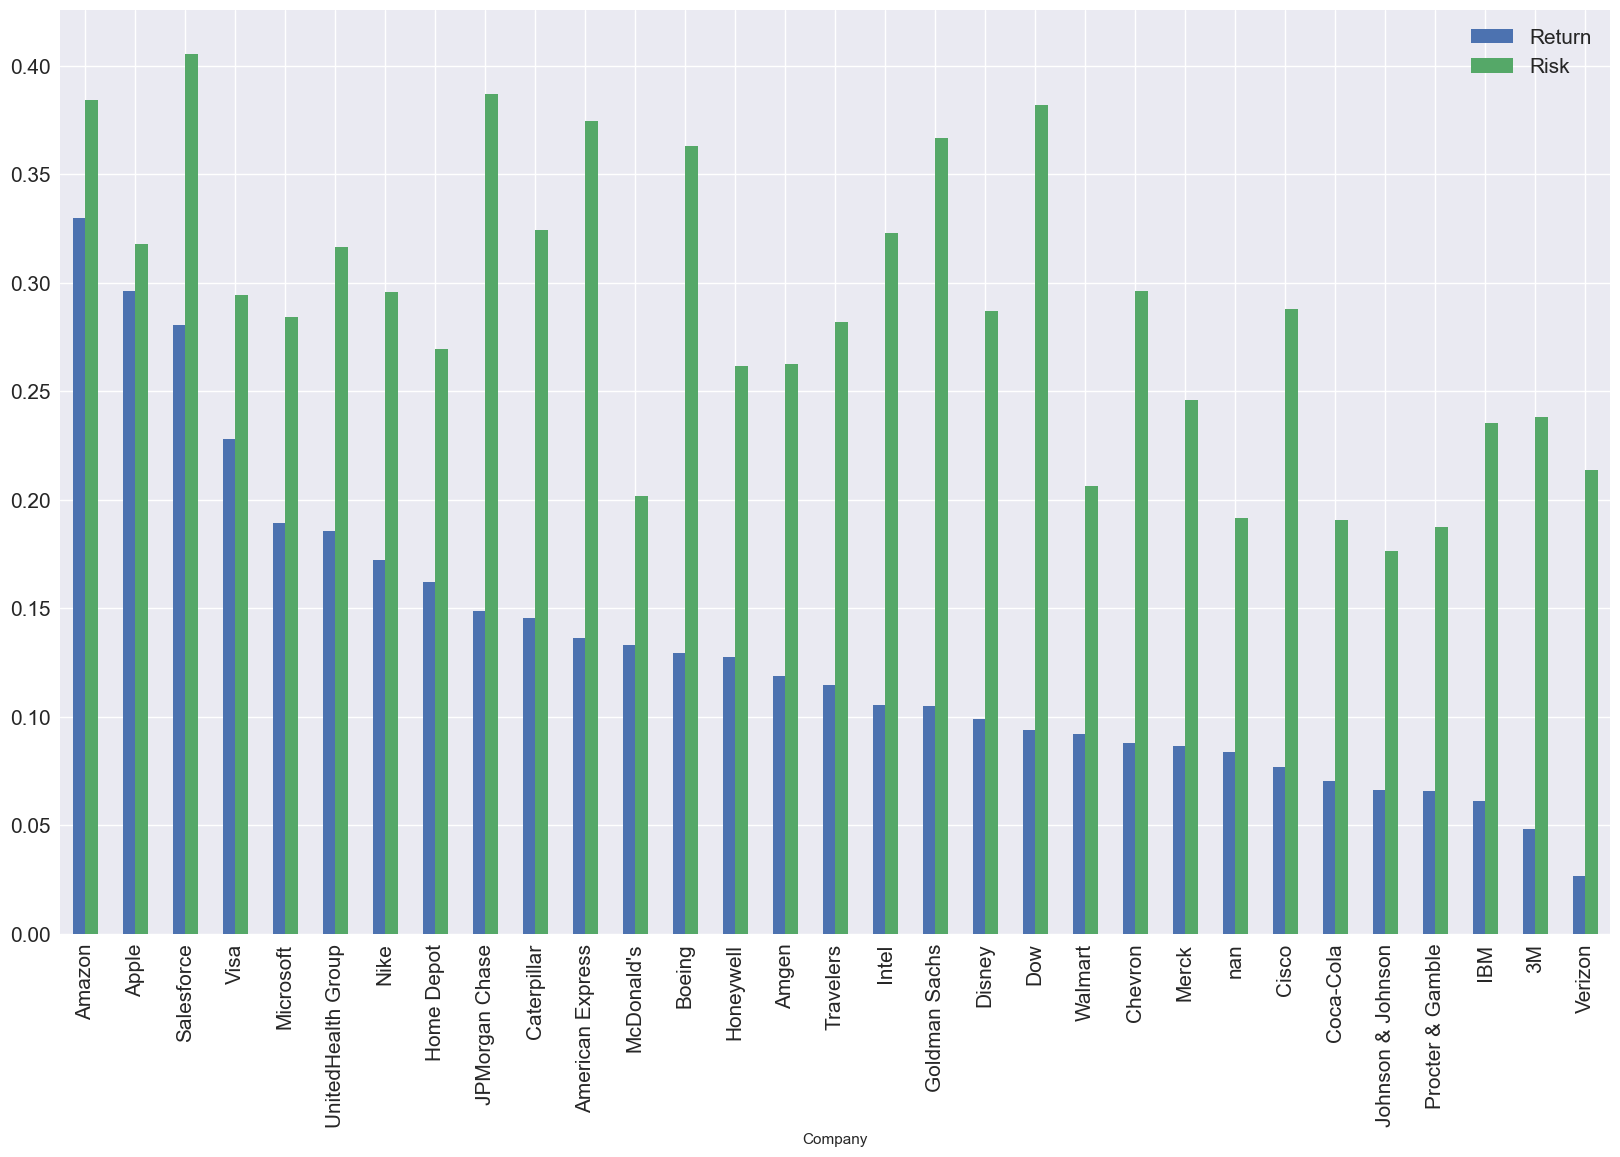

In [223]:

summary.sort_values(by = "Return", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                            fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


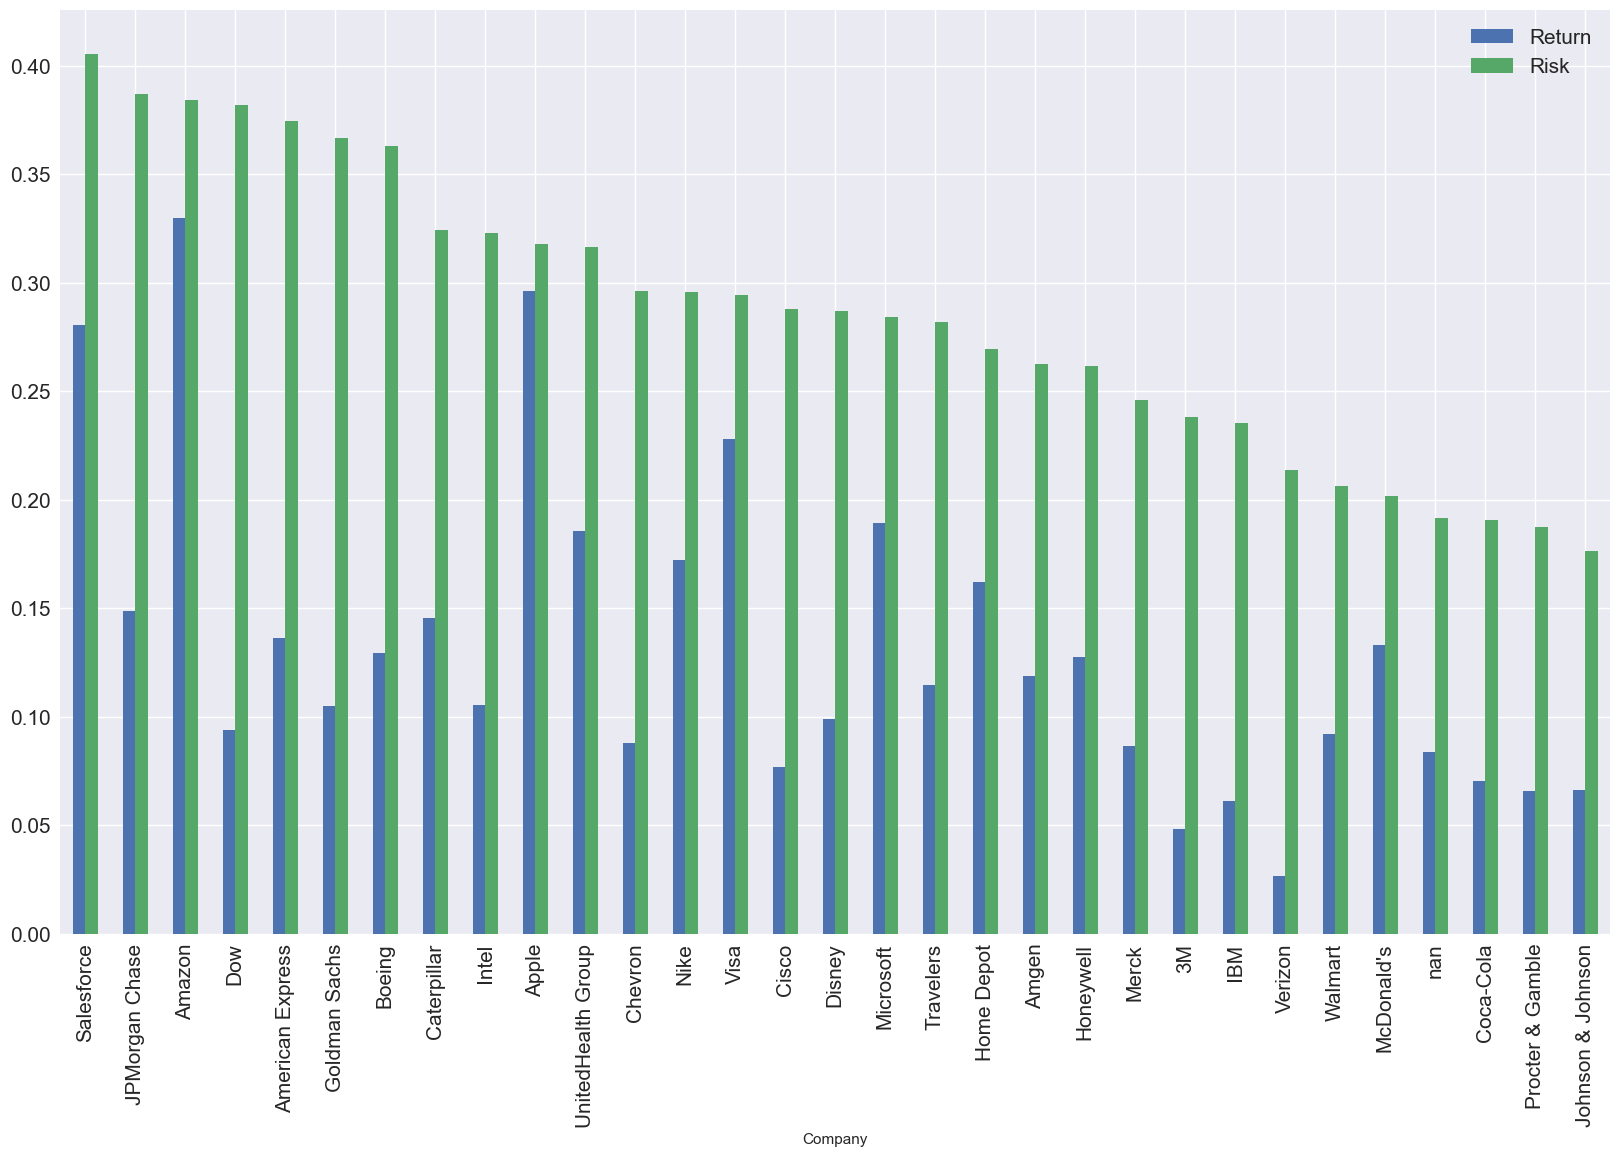

In [224]:
summary.sort_values(by = "Risk", ascending = False).plot(kind = "bar", figsize = (20, 12), 
                                                          fontsize = 15)
plt.legend(fontsize = 15)
plt.show()



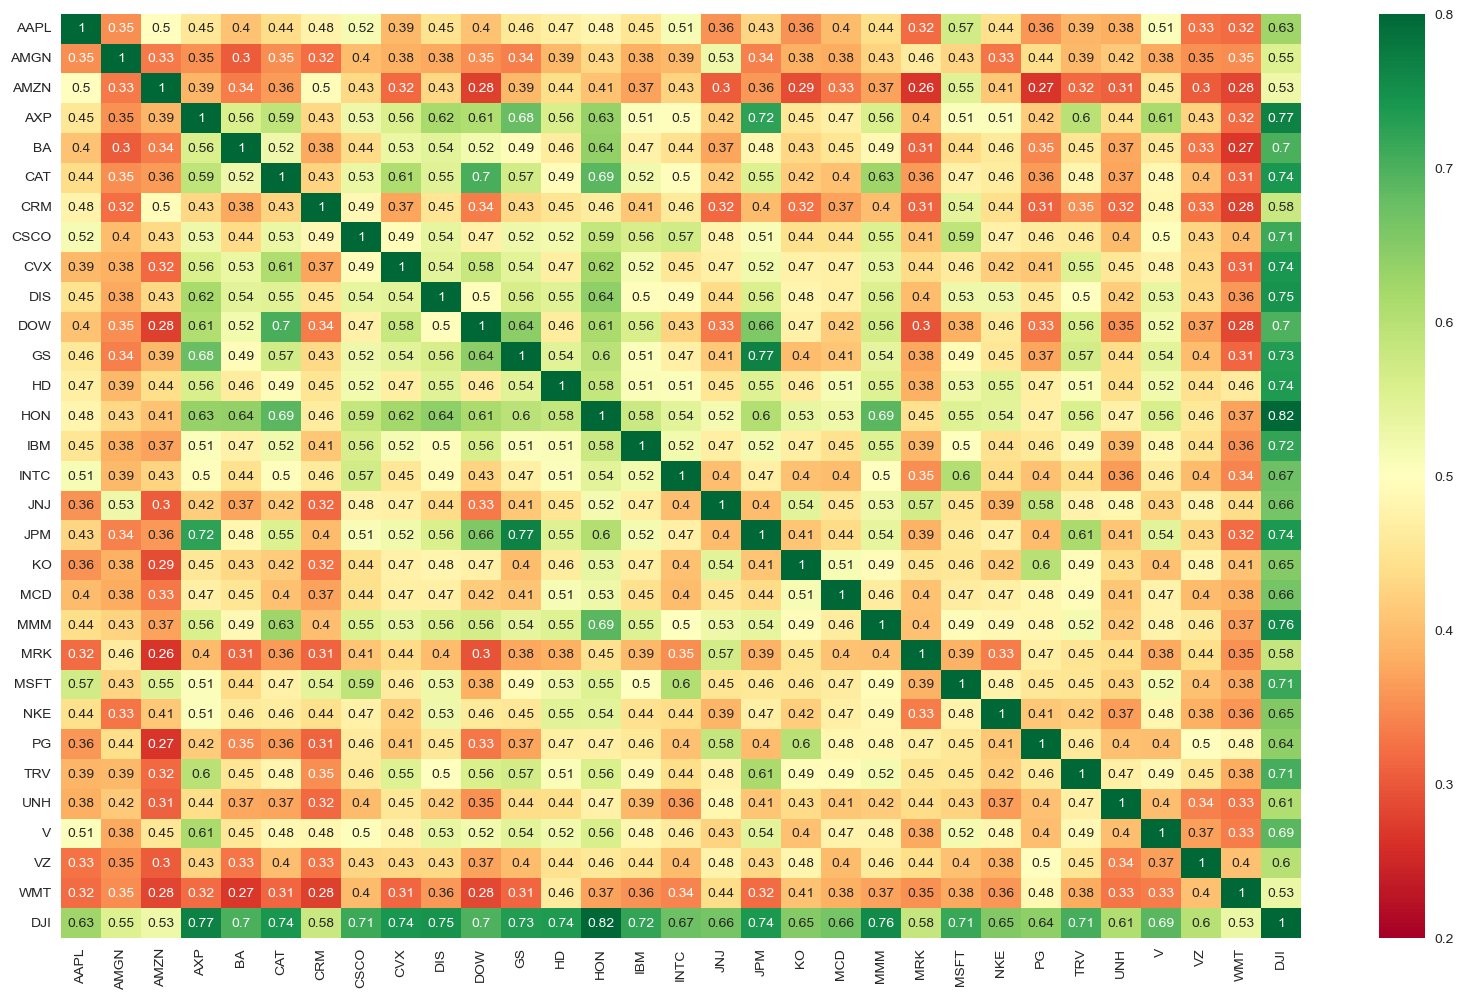

In [225]:
corr_matrix = ret.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, cmap='RdYlGn',annot=True, vmin = 0.2, vmax = 0.8)
plt.show()

Goal: Selecting 10 Stocks with the lowest individual Tracking Error (TE) in the Training/Fitting Period.

Training/Fitting Period: 2017 & 2022
(Forward) Testing Period: 2023

In [660]:
df2 = df.loc["2022":"2023"].copy()

In [661]:
norm2 = df2.div(df2.iloc[0]).mul(100)

In [662]:
ret2 = ret.loc["2022":"2023"].copy()

In [663]:
ret_diff = ret2.sub(ret2.DJI, axis = 0)

In [664]:
## Stock Selection

In [665]:
def tracking_ann(returns):
    summary = returns.agg(["mean", "std"]).T
    summary["Premium"] = summary["mean"] * 252
    summary["TE"] = summary["std"] * np.sqrt(252)
    summary.drop(columns = ["mean", "std"], inplace = True)
    return summary

In [666]:
tracking = tracking_ann(ret_diff)
tracking

,Premium,TE
AAPL,0.051429,0.197575
AMGN,0.115360,0.201796
AMZN,0.012257,0.350412
AXP,0.085225,0.221820
BA,0.171812,0.309777
CAT,0.196924,0.247912
CRM,0.063916,0.317519
CSCO,-0.112880,0.196627
CVX,0.130155,0.261124
DIS,-0.250410,0.247557


In [667]:
tracking.sort_values(by = "TE")

,Premium,TE
DJI,0.000000,0.000000
HON,-0.004624,0.139786
MCD,0.033911,0.142830
KO,-0.019613,0.147198
V,0.090698,0.167867
PG,-0.069001,0.169427
IBM,0.091193,0.170371
JNJ,-0.061188,0.170889
JPM,0.037845,0.178920
GS,0.009258,0.180539


In [668]:
noa = 10
tracking_stocks = tracking.sort_values(by = "TE").index[:noa+1]
norm_track = norm2.loc[:, tracking_stocks]

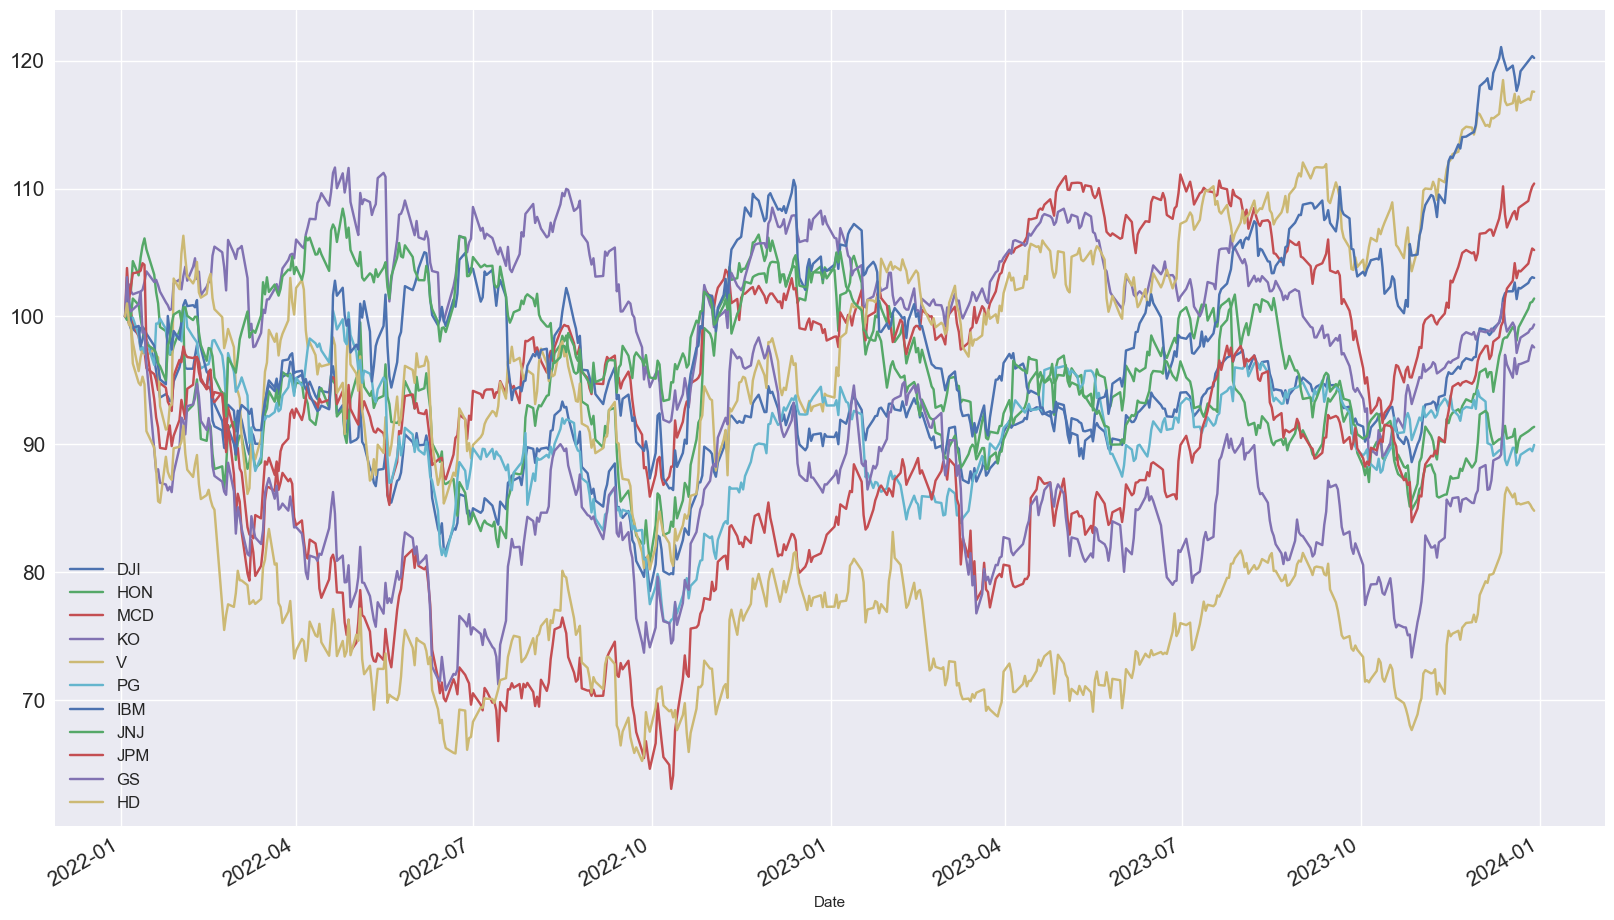

In [669]:
norm_track.plot(figsize = (20, 12), fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [670]:
tracking_stocks = tracking_stocks[1:]
tracking_stocks

Index(['HON', 'MCD', 'KO', 'V', 'PG', 'IBM', 'JNJ', 'JPM', 'GS', 'HD'], dtype='object')

In [671]:
## Optimum portfolio

In [672]:
import scipy.optimize as sco #import scipy optimize

In [673]:
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})
cons

{'type': 'eq', 'fun': <function __main__.<lambda>(x)>}

In [674]:
bnds =  tuple((0,1) for x in range(noa))
bnds

((0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1))

In [675]:
eweights = np.full(noa, 1/noa)
eweights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [676]:
ret2.loc[:, tracking_stocks].mean(axis = 1)
ret2.loc[:, tracking_stocks].dot(eweights)

def port_ret(weights):
    return ret2.loc[:, tracking_stocks].dot(weights)

In [677]:
def tracking_error(weights): 
     return port_ret(weights).sub(ret2.DJI).std() * np.sqrt(252)

In [678]:
opts = sco.minimize(tracking_error, eweights, method = "SLSQP", bounds = bnds, constraints= cons)
#output of optimization
opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.05020416064183454
       x: [ 1.678e-01  9.371e-02  6.887e-02  1.460e-01  5.651e-02
            7.300e-02  8.357e-02  6.381e-02  1.385e-01  1.082e-01]
     nit: 6
     jac: [ 2.588e-02  2.549e-02  2.587e-02  2.556e-02  2.539e-02
            2.552e-02  2.561e-02  2.581e-02  2.544e-02  2.540e-02]
    nfev: 66
    njev: 6

In [679]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.16779905, 0.09371415, 0.06887108, 0.14604289, 0.05650678,
       0.07299577, 0.08356504, 0.06381156, 0.13850659, 0.10818708])

In [680]:
pd.Series(index = tracking_stocks, data = optimal_weights)

HON    0.167799
MCD    0.093714
KO     0.068871
V      0.146043
PG     0.056507
IBM    0.072996
JNJ    0.083565
JPM    0.063812
GS     0.138507
HD     0.108187
dtype: float64

In [681]:
opt_port = port_ret(optimal_weights)[1:].add(1).cumprod().mul(100)
norm_track["Opt_Port"] = opt_port
norm_track.iloc[0, -1] = 100

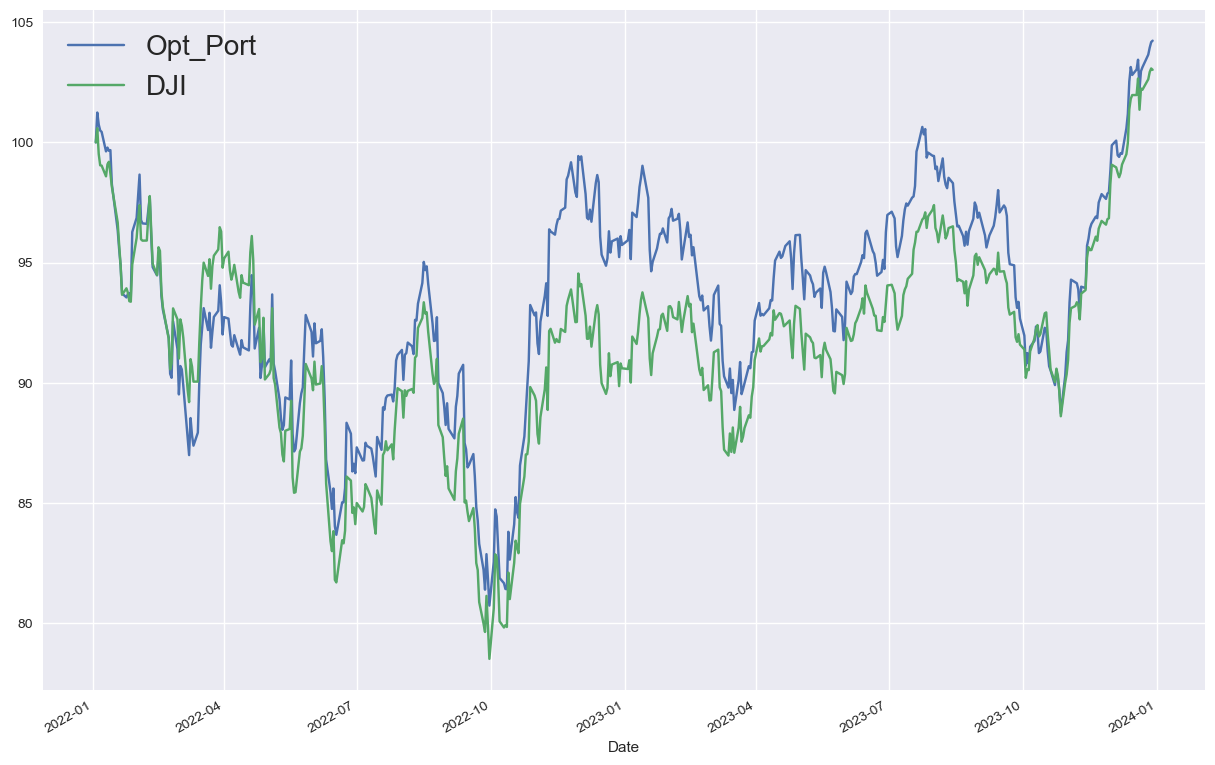

In [682]:
norm_track[["Opt_Port", "DJI"]].plot(figsize = (15, 10))
plt.legend(fontsize = 20, loc = 2)
plt.show()

In [683]:
summary_ann(norm_track[["Opt_Port", "DJI"]].pct_change())

,Return,Risk
Opt_Port,0.033977,0.161999
DJI,0.028075,0.161864


In [684]:
ret

,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,GS,HD,HON,IBM,INTC,JNJ,JPM,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WMT,DJI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-04,0.022196,0.042836,0.005168,-0.007290,0.004037,-0.002616,0.050180,0.026325,-0.009722,0.007895,NaN,-0.009316,-0.012174,-0.000444,0.010692,0.040295,0.012500,0.002496,0.000412,-0.007522,-0.003961,0.024761,-0.001675,0.010239,-0.007592,-0.008403,0.006468,NaN,0.005553,0.004837,0.000495
2007-01-05,-0.007121,0.002383,-0.013625,-0.013184,-0.004244,-0.012787,0.043295,0.000351,0.003842,-0.008123,NaN,0.001006,-0.019226,-0.009539,-0.009053,-0.003307,-0.009073,-0.008300,-0.006996,0.000000,-0.006799,-0.017956,-0.005703,0.001622,-0.008587,-0.012994,-0.006804,NaN,-0.017092,-0.008162,-0.006625
2007-01-08,0.004938,-0.007972,-0.022674,0.009471,-0.002356,0.001162,0.010374,0.005620,0.012757,0.009067,NaN,0.023512,-0.007540,0.006047,0.015192,-0.004265,-0.001651,0.003348,0.006424,0.003904,0.002196,-0.000226,0.009784,-0.003036,0.002205,-0.007441,0.014653,NaN,-0.015249,-0.008230,0.002055
2007-01-09,0.083070,0.004793,0.007467,-0.006366,-0.010569,0.005474,0.000751,-0.005589,-0.011477,-0.001449,NaN,0.001718,-0.004305,0.007124,0.011830,0.000952,-0.003759,-0.004171,0.000824,0.001830,0.001160,-0.009257,0.001002,0.012484,-0.002514,-0.002499,-0.012003,NaN,0.004075,0.008298,-0.000555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,0.017291,-0.002730,0.004221,-0.006030,0.001000,-0.003405,0.007847,0.002256,-0.010867,0.002729,0.000210,-0.001089,0.002877,0.008459,0.019541,0.004004,-0.000597,0.005691,0.001064,0.007294,0.012313,0.002784,-0.118257,0.007071,0.001239,0.000827,-0.004277,0.001603,0.011951,-0.000491
2023-12-26,-0.002841,-0.000915,-0.000065,0.002102,0.009023,0.018150,-0.000451,0.003793,0.009004,-0.000769,0.010704,0.002522,0.002065,0.011671,0.006599,0.052083,0.004374,0.005914,0.004115,0.003977,0.016740,-0.000650,0.000214,-0.000185,0.004543,0.006943,-0.000538,0.002825,-0.000267,-0.001532,0.004263
2023-12-27,0.000518,0.009264,-0.000456,0.005915,-0.002626,0.008423,0.001878,0.003182,-0.003281,-0.006267,0.000000,0.007521,-0.002233,0.004711,0.001532,0.005148,0.001345,0.005998,0.002561,0.005771,0.005827,0.003252,-0.001575,-0.008239,0.000822,0.008178,0.005307,-0.000888,-0.004536,0.009398,0.002962


In [685]:
##Forward Testing

In [686]:
def tracking_error_gen(data, tracking_stocks, weights, index, start, end):
    return data.loc[start:end, tracking_stocks].dot(weights).sub(ret.loc[start:end, index]).std() * np.sqrt(252)

In [687]:
def visual(data, tracking_stocks, weights, index, start, end):
    track = data.loc[start:end, tracking_stocks].dot(weights).add(1).cumprod().mul(100)
    track.name = "Portfolio"
    index = data.loc[start:end, index].add(1).cumprod().mul(100)
    plt.figure(figsize = (12,8))
    track.plot()
    index.plot()
    plt.legend(fontsize = 20, loc = 2)
    plt.show()

In [688]:
tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", "2007-01-01", "2022-12-31")

0.06419855764505544

In [689]:
forward_te = tracking_error_gen(ret, tracking_stocks, optimal_weights, "DJI", 
                                "2023-01-01", "2023-12-31")
forward_te

0.04630262721450115

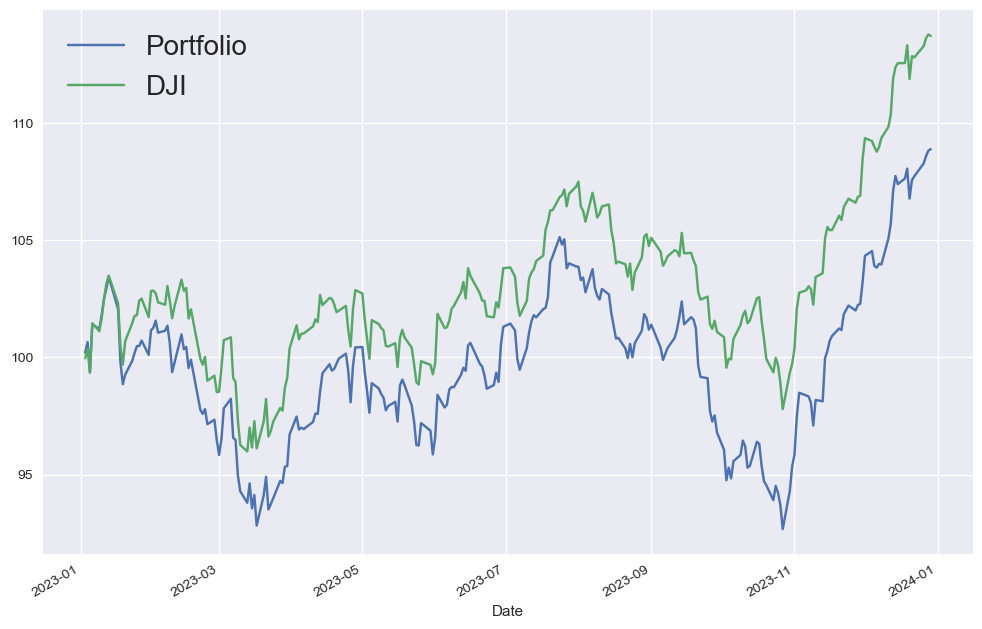

In [690]:
visual(ret, tracking_stocks, optimal_weights, "DJI", "2023-01-01", "2023-12-31")

In [691]:
bucket = df.columns.drop(["DOW", "DJI"])

In [692]:
np.random.choice(bucket, size = noa, replace = False)

array(['KO', 'CVX', 'V', 'PG', 'DIS', 'AMGN', 'JPM', 'CSCO', 'MRK',
       'MSFT'], dtype=object)

In [693]:
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()
random_weights.sum()

1.0

In [694]:
np.random.seed(123)
random_stocks = np.random.choice(bucket, size = noa, replace = False)
random_numbers = np.random.random(noa)
random_weights = random_numbers / random_numbers.sum()

In [695]:
print(random_stocks, random_weights)

['CSCO' 'WMT' 'CAT' 'UNH' 'CVX' 'V' 'HON' 'MSFT' 'HD' 'NKE'] [0.0858475  0.05974735 0.098733   0.14853474 0.07177554 0.08370995
 0.13136476 0.07500036 0.04705319 0.19823361]


In [696]:
tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2007-01-01", "2022-12-31")

0.07008605540129986

In [697]:
forward_te_r = tracking_error_gen(ret, random_stocks, random_weights, "DJI", 
                                "2023-01-01", "2023-12-31")
forward_te_r

0.05406094188244216

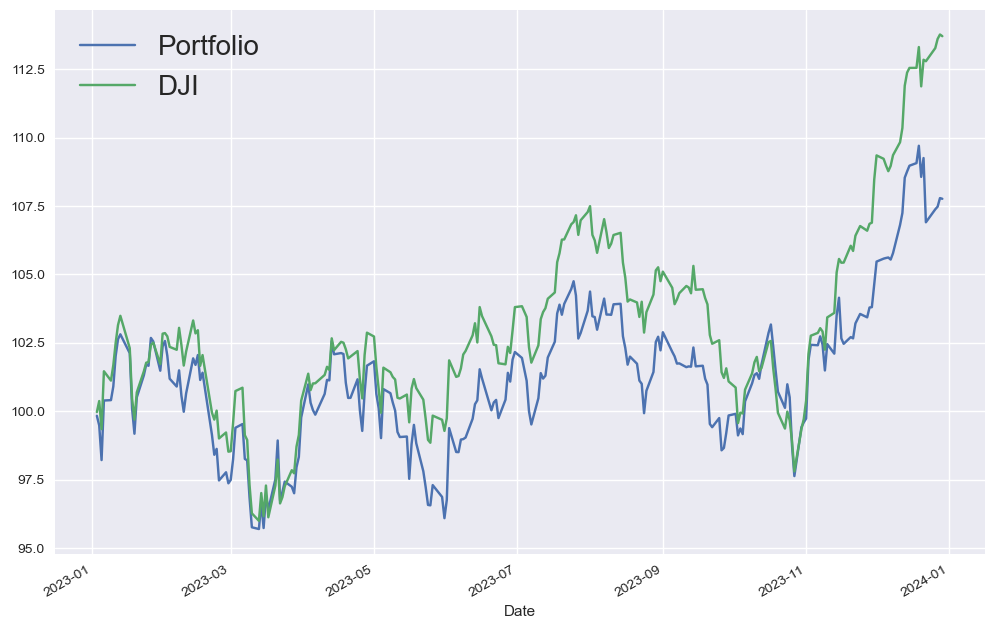

In [698]:
visual(ret, random_stocks, random_weights, "DJI", "2023-01-01", "2023-12-31")

In [699]:
tes = np.empty(10000)
np.random.seed(123)
for i in range(10000):
    random_numbers = np.random.random(noa)
    random_weights = random_numbers / random_numbers.sum()
    random_stocks = np.random.choice(bucket, size = noa, replace = False)
       
    tes[i] = tracking_error_gen(ret, random_stocks, random_weights, "DJI", "2023-01-01", "2023-12-31")

In [700]:
(tes < forward_te).mean()

0.0092

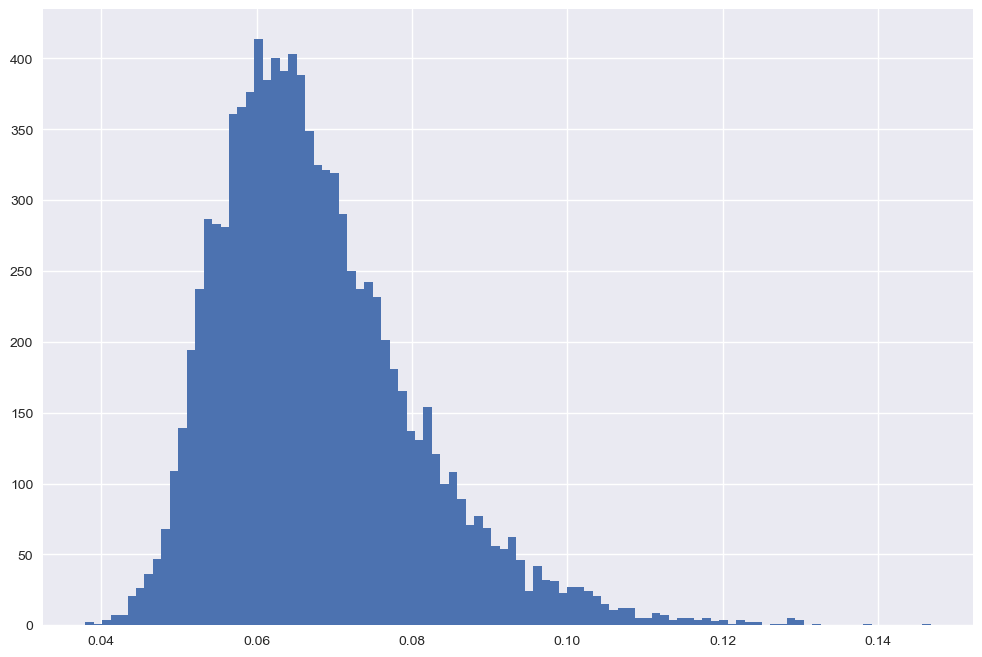

In [701]:
plt.figure(figsize = (12, 8))
plt.hist(tes, bins = 100)
plt.show()